In [1]:
# We are going to do handwriting classification
# This is with the devanagari which is the Hindi alphabet
# It has 47 primary characters

# We need to unzip the file
# !unzip "/content/drive/My Drive/DL, CV and NLP/Devanagari.zip" -d "/content/drive/My Drive/DL, CV and NLP"

In [2]:
# We see that we already have train and test data
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image   # To display image

import os
import cv2    # Computer vision package
from google.colab.patches import cv2_imshow   # This is a patch to allow google colab to show images

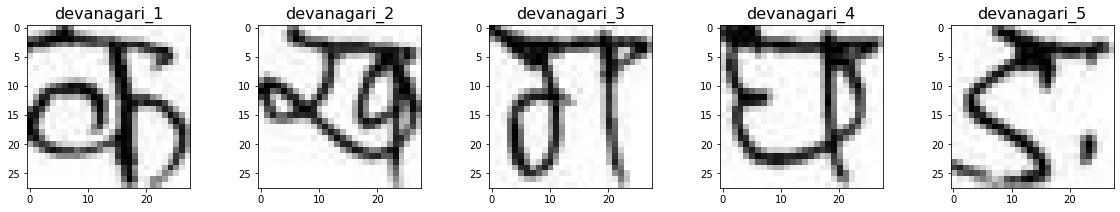

In [3]:
# Open Devanagari image and display
devanagari_img_1 = Image.open("/content/drive/My Drive/DL, CV and NLP/Devanagari/TRAIN/1/010_09.jpg")
devanagari_img_2 = Image.open("/content/drive/My Drive/DL, CV and NLP/Devanagari/TRAIN/2/010_09.jpg")
devanagari_img_3 = Image.open("/content/drive/My Drive/DL, CV and NLP/Devanagari/TRAIN/3/010_09.jpg")
devanagari_img_4 = Image.open("/content/drive/My Drive/DL, CV and NLP/Devanagari/TRAIN/4/010_09.jpg")
devanagari_img_5 = Image.open("/content/drive/My Drive/DL, CV and NLP/Devanagari/TRAIN/5/010_09.jpg")

# We will plot using subplotting
fig = plt.figure(figsize = (20,3))
a1 = fig.add_subplot(1, 5, 1)   # this means 1 row, 5 columns, and this is the first one
img_plot = plt.imshow(devanagari_img_1, cmap = 'gray')
a1.set_title("devanagari_1", fontsize = 16)

a1 = fig.add_subplot(1, 5, 2)   
img_plot = plt.imshow(devanagari_img_2, cmap = 'gray')
a1.set_title("devanagari_2", fontsize = 16)

a1 = fig.add_subplot(1, 5, 3)   
img_plot = plt.imshow(devanagari_img_3, cmap = 'gray')
a1.set_title("devanagari_3", fontsize = 16)

a1 = fig.add_subplot(1, 5, 4)   
img_plot = plt.imshow(devanagari_img_4, cmap = 'gray')
a1.set_title("devanagari_4", fontsize = 16)

a1 = fig.add_subplot(1, 5, 5)   
img_plot = plt.imshow(devanagari_img_5, cmap = 'gray')
a1.set_title("devanagari_5", fontsize = 16)

plt.show()

In [4]:
# Display the folders that contain the data 
os.listdir('/content/drive/My Drive/DL, CV and NLP/Devanagari')

['TRAIN', 'TEST']

In [5]:
# Save the directories for train and test data
train_folder = '/content/drive/My Drive/DL, CV and NLP/Devanagari/TRAIN/'
test_folder = '/content/drive/My Drive/DL, CV and NLP/Devanagari/TEST/'

**Data Augmentation**

* All RGB data will be used to form new samples for train and test
* Samples will be generated using ImageDataGenerator
* It will create new samples from images
* Images will be resampled using normalisation (divide each pixel by 255), shear rande, zoom range, brightness, etc.

In [6]:
# We need to import some packages 
from keras.preprocessing.image import load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from numpy import expand_dims

In [7]:
# Let;s see what ImageDataGenerator does
img = load_img('/content/drive/My Drive/DL, CV and NLP/Devanagari/TRAIN/1/010_09.jpg')
# pass image to array
data = img_to_array(img)
# It's a 2d image now
samples = expand_dims(data, 0)

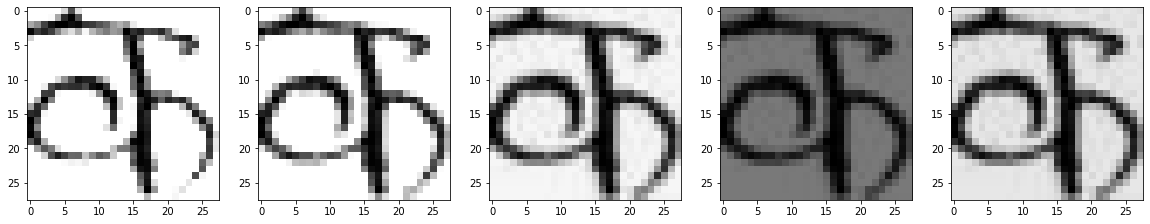

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [8]:
# We can see what brightness does
datagen = ImageDataGenerator(brightness_range = [0.2,2.0]) # gives range of brightness
# Only 1 thing in samples so batch_size must be 1
IDG = datagen.flow(samples, batch_size = 1)

fig, ax = plt.subplots(1, 5, figsize = (20,10))
for i in range(5):
  fig = plt.figure()
  batch = IDG.next()
  image = batch[0].astype('uint8')
  ax[i].imshow(image)

plt.show()

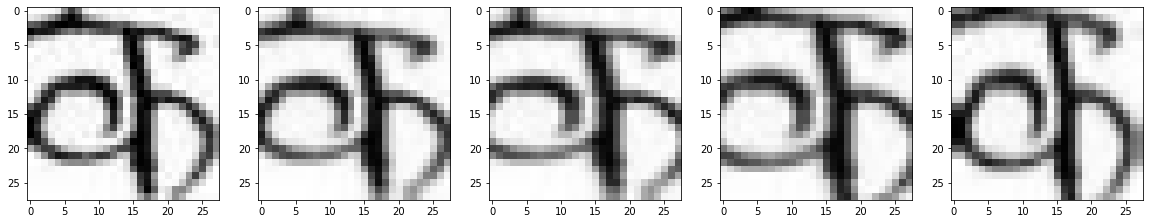

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [9]:
# We can see what zoom_range does
datagen = ImageDataGenerator(zoom_range = 0.2)
# Only 1 thing in samples so batch_size must be 1
IDG = datagen.flow(samples, batch_size = 1)

fig, ax = plt.subplots(1, 5, figsize = (20,10))
for i in range(5):
  fig = plt.figure()
  batch = IDG.next()
  image = batch[0].astype('uint8')
  ax[i].imshow(image)

plt.show()

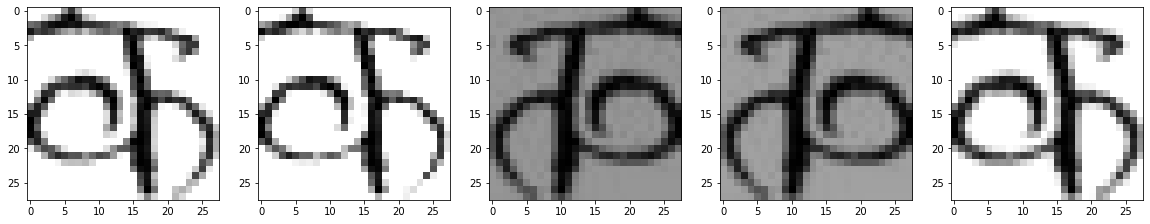

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [10]:
# You can do multiple things at once
datagen = ImageDataGenerator(brightness_range = [0.2,2.0],
                             horizontal_flip = True, # maybe not the best thing to do with handwriting detection
                             shear_range = 0.5)
# Only 1 thing in samples so batch_size must be 1
IDG = datagen.flow(samples, batch_size = 1)

fig, ax = plt.subplots(1, 5, figsize = (20,10))
for i in range(5):
  fig = plt.figure()
  batch = IDG.next()
  image = batch[0].astype('uint8')
  ax[i].imshow(image)

plt.show()

In [11]:
# Let's build a data generator for the train data 
# We do not change the test data 
train_datagen = ImageDataGenerator(rescale = 1./255,          # rescale each pixel by 255
                                   brightness_range = [0.8,1.5],    # brightness
                                   rotation_range = 20,       # 20 degree rotation range
                                   zoom_range = 0.1)          # zoom the image

test_datagen = ImageDataGenerator(rescale = 1./255)           # only rescale test data

In [12]:
batch_size = 64   # set the batch size (this seems to be the best)

In [13]:
# Reshape image with target size of (64,64)
training_set = train_datagen.flow_from_directory(train_folder,
                                                 target_size = (64,64),       # need to fix the size of the input as some train images may be different sizes
                                                 batch_size = 64,
                                                 class_mode = 'categorical')  # doing a classification

test_set = train_datagen.flow_from_directory(test_folder,
                                                 target_size = (64,64), 
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

Found 6528 images belonging to 48 classes.
Found 3312 images belonging to 48 classes.


In [14]:
# Note that these are B+W images which have rank 3
# This is because they are a combination of RGB
# A greyscale image only has rank 2 because it is just about brightness

In [15]:
training_set.image_shape # (64,64,3)

(64, 64, 3)

In [16]:
# Note that training_set at the first level has groups of 64 images 
# We can display each individual image with 3 indices
training_set[0][0][0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

**CNN**

In [17]:
import keras 
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import Conv2D, MaxPooling2D, Flatten # there is 3d and 1d too 
from keras.layers import Dropout, ZeroPadding2D 
from keras.layers import BatchNormalization 
# Droptout and BatchNormalization avoid over fitting

In [18]:
# BatchNormalization - Scaling inputs after activation function in each layer
# Dropout - To avoid overfitting
# outpiut layer ~ 50% dropout 
# hiddden layer ~ 20-25% dropout

In [19]:
# build_model function 
def build_model():
  model = Sequential()

  ## CONVOLUTION I ##

  # 0-padding
  model.add(ZeroPadding2D((1,1),
                          input_shape = training_set.image_shape
                          ))
    
  # Convolution
  model.add(Conv2D(filters = 64,
                   kernel_size = (3,3),
                   strides = (1,1),         # this is the default value
                   activation = 'relu'))
  
  # Btach normalisation normalises after convolution
  model.add(BatchNormalization())

  # Pooling
  model.add(MaxPooling2D(pool_size = (2,2),
                         strides = (2,2)))
  
  # drop out
  # model.add(Dropout(...))
  

  ## CONVOLUTION II ##

  # 0-padding
  model.add(ZeroPadding2D((1,1)))
    
  # Convolution
  model.add(Conv2D(filters = 128,
                   kernel_size = (3,3),
                   strides = (1,1),         # this is the default value
                   activation = 'relu'))
  
  # Btach normalisation normalises after convolution
  model.add(BatchNormalization())

  # Pooling
  model.add(MaxPooling2D(pool_size = (2,2),
                         strides = (2,2)))
  

  ## CONVOLUTION III ##

  # 0-padding
  model.add(ZeroPadding2D((1,1)))
    
  # Convolution
  model.add(Conv2D(filters = 256,
                   kernel_size = (3,3),
                   strides = (1,1),         # this is the default value
                   activation = 'relu'))
  
  # Btach normalisation normalises after convolution
  model.add(BatchNormalization())

  # Pooling
  model.add(MaxPooling2D(pool_size = (2,2),
                         strides = (2,2)))
  

  ## CONVOLUTION IV ##

  # 0-padding
  model.add(ZeroPadding2D((1,1)))
    
  # Convolution
  model.add(Conv2D(filters = 512,
                   kernel_size = (3,3),
                   strides = (1,1),         # this is the default value
                   activation = 'relu'))
  
  # Btach normalisation normalises after convolution
  model.add(BatchNormalization())

  # Pooling
  model.add(MaxPooling2D(pool_size = (2,2),
                         strides = (2,2)))
  

  # We want the final image to be 4x4, that is how we choose the architecture of the NN
  # We should not be smaller than 4x4
  

  ## FLATTEN ##
  model.add(Flatten())


  ## FULLY CONNECTED LAYER ##
  model.add(Dense(units = 512,
                  activation = 'relu'))
  

  ## OUTPUT ##
  model.add(Dense(units = 48,
                  activation = 'softmax'))
  

  ## LEARNING RATE ##
  adam_optimizer = keras.optimizers.Adam(learning_rate = 0.0001)


  ## COMPILE ##
  model.compile(optimizer = adam_optimizer,
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])
  
  return model

In [20]:
model = build_model()
model.summary()  # can use this to understand how the NN affects the image

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 66, 66, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 128)       5

In [21]:
# We can use callbacks to help decide the number of epochs to use
# suppose we train, it gets a good accuracy and then decreases again
# How do we decide which is the optimal number of epochs?

from keras import callbacks 

filepath = '/content/drive/My Drive/DL, CV and NLP/Best_Model_CNN_Devanagari.hdf5'
checkpoint = callbacks.ModelCheckpoint(filepath,                  # where to save it
                                        moniter = 'val_loss',     # choose what you are monitering
                                        save_best_only = True,    # save only the best value
                                        mode = 'min',             # best is the minimum
                                        verbose = 1)

callback_list = [checkpoint]

In [ ]:
# steps_per_epoch = # samples / batch_size
# history = model.fit_generator(generator = training_set,
#                               validation_data = training_set,
#                               epochs = 30,
#                               shuffle = True,
#                               steps_per_epoch = int(6528/batch_size),
#                               validation_steps = int(3312/batch_size),
#                               callbacks = callback_list,
#                               verbose = 1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
102/102 [==============================] - ETA: 0s - loss: 2.3478 - accuracy: 0.3911
Epoch 00001: val_loss improved from inf to 4.65270, saving model to /content/drive/My Drive/DL, CV and NLP/Best_Model_CNN_Devanagari.hdf5
102/102 [==============================] - 26s 251ms/step - loss: 2.3478 - accuracy: 0.3911 - val_loss: 4.6527 - val_accuracy: 0.0221
Epoch 2/30
102/102 [==============================] - ETA: 0s - loss: 1.0301 - accuracy: 0.7005
Epoch 00002: val_loss improved from 4.65270 to 4.57246, saving model to /content/drive/My Drive/DL, CV and NLP/Best_Model_CNN_Devanagari.hdf5
102/102 [==============================] - 29s 283ms/step - loss: 1.0301 - accuracy: 0.7005 - val_loss: 4.5725 - val_accuracy: 0.0634
Epoch 3/30
102/102 [==============================] - ETA: 0s - loss: 0.6924 - accuracy: 0.7886
Epoch 00003: val_loss improved from 4.57246 to 3.57751, saving model to /content/drive/M

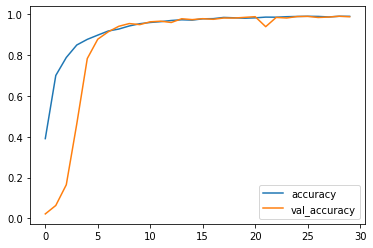

In [ ]:
# pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()

In [22]:
# We can upload the weights from the best outcome using
model.load_weights('/content/drive/My Drive/DL, CV and NLP/Best_Model_CNN_Devanagari.hdf5')

In [24]:
# Suppose we want to check our own images in the trained CNN
import cv2

In [26]:
# read the png image
# Note that opencv reads data in BGR format, not RGB
img_1 = cv2.imread('/content/drive/My Drive/DL, CV and NLP/devanagiri.png')
img_2 = cv2.imread('/content/drive/My Drive/DL, CV and NLP/Devanagari_2.png')

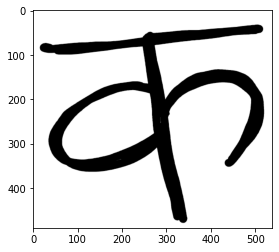

In [29]:
plt.imshow(img_1)

In [31]:
# We note that these images are the wrong shape for the CNN
img_1.shape, img_2.shape, training_set.image_shape

((490, 538, 3), (219, 262, 3), (64, 64, 3))

In [43]:
# We have to reshape our images and turn them in RGB
img_1= cv2.resize(img_1, (64,64))
b, g, r = cv2.split(img_1)
img_1= cv2.merge([r,g,b])

In [44]:
img_2= cv2.resize(img_2, (64,64))
b, g, r = cv2.split(img_2)
img_2= cv2.merge([r,g,b])

In [45]:
# check the shape 
img_1.shape, img_2.shape, training_set.image_shape

((64, 64, 3), (64, 64, 3), (64, 64, 3))

In [46]:
# lets predict img_1
X_new = np.squeeze(img_1)
X_new = X_new.astype('float32')
X_new /= 255
X_new = X_new.reshape(1,64,64,3)

In [47]:
# Let's predict
np.argmax(model.predict(X_new)) # get 0 which is the first element which this symbol is
# The model is working well!

0

In [48]:
# lets predict img_1
X_new = np.squeeze(img_2)
X_new = X_new.astype('float32')
X_new /= 255
X_new = X_new.reshape(1,64,64,3)
np.argmax(model.predict(X_new)) # 0

0

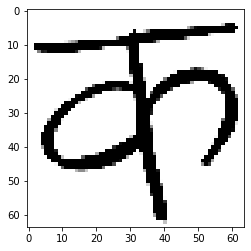

In [49]:
plt.imshow(img_1)

In [51]:
# We see the model seems to be very accurate
# Indeed get around 98% accuracy
model.evaluate_generator(test_set)

Instructions for updating:
Please use Model.evaluate, which supports generators.


KeyboardInterrupt: ignored